# Part II CDC Heart Disease Analysis
## by Rodrigo Tiscareno

In [2]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Specifying default color for visualiations
default_color = sb.color_palette()[0]

import warnings
warnings.simplefilter("ignore")

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('heart_2020_cleaned.csv')
# Filtering all entries with BMI greater than 80.
df = df.loc[df['BMI'] < 80]
# Filtering all entries with SleepTime greater than 20.
df = df.loc[df['SleepTime'] <= 20]

dfML = df.copy()
binary_variables = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke', 
                    'DiffWalking', 'DiffWalking', 'PhysicalActivity', 'Asthma', 
                    'KidneyDisease', 'SkinCancer', 'Diabetic']

for var in binary_variables:
    dfML[var] = pd.get_dummies(df[var]).drop('No', axis = 1).rename(columns = {'Yes':var})
    
# One Hot Encoding categorical variables
categorical_vars = ['Sex', 'AgeCategory', 'Race','GenHealth']
new_cols = []
for var in categorical_vars:
    new_cols = pd.get_dummies(dfML[var])
    dfML = pd.concat([dfML, new_cols], axis = 1)
    dfML.drop(columns = [var], inplace=True)

## BMI - How this it affect risk of heart disease diagnosis?

BMI is a key indicator of general health. It is derived from the ratio between a patient's weight and height. In our analysis, we found that BMI is positively correlated with a higher risk of heart disease. The higher a patient's BMI, the increased likelihood of future heart disease diagnosis. As seen from the plots, there is a slight difference in the interquartile range, median, and mean of BMI values of patients with and without heart disease. Albeit this difference is minimal as per the plot, even a 2%-3% difference can be significant. This initial investigation drove further analysis into a patient's attributes that not only affect risk of heart disease, but also general health and physical activity.

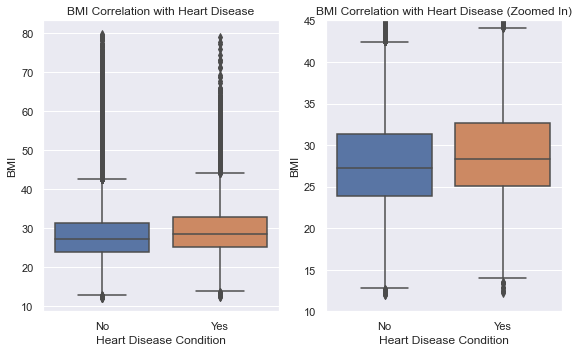

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,5))
sb.boxplot(x = 'HeartDisease', y = 'BMI', data = df, ax = ax[0])
ax[0].set_xlabel('Heart Disease Condition')
ax[0].set_title('BMI Correlation with Heart Disease')

sb.boxplot(x = 'HeartDisease', y = 'BMI', data = df, ax = ax[1])
ax[1].set_xlabel('Heart Disease Condition')
ax[1].set_title('BMI Correlation with Heart Disease (Zoomed In)')
plt.ylim(10, 45)

plt.tight_layout()
plt.show()

## Sleep Time - Does it play a role in preventing heart disease or lowering BMI?

When we think of sleep, we usually think of reducing one's level of mental and physical fatigue as we dive into a slumber state. However, in our investigation, we found that poor sleep drives a higher BMI value, also increasing a patient's risk of heart disease. We found that a minimum of 7 hours of sleep at all ages can dramatically decrease one's BMI and therefore reduce the risk of many diseases, not limited to heart disease.

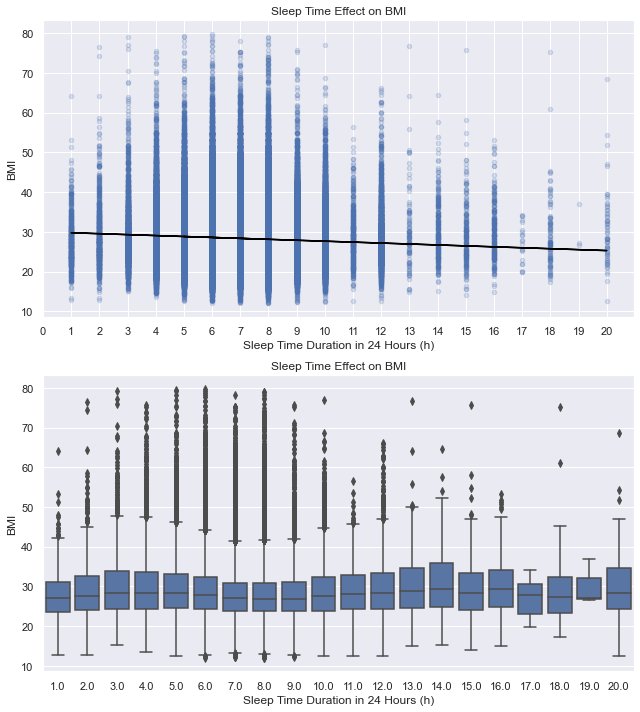

In [5]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (9, 10))

bins = np.arange(0, 21)

x = df['SleepTime']
y = df['BMI']

fit = np.polyfit(x, y, 1)

ax[0].plot(x,np.polyval(fit, x), "black")

df.plot.scatter(x = 'SleepTime',y = 'BMI', ax = ax[0], alpha = 0.2)
ax[0].set_xlabel('Sleep Time Duration in 24 Hours (h)')
ax[0].set_ylabel('BMI')
ax[0].set_title('Sleep Time Effect on BMI')
ax[0].set_xticks(np.arange(0, 21, 1))

sb.boxplot(x = 'SleepTime',y = 'BMI', data = df, ax = ax[1], color = default_color)
ax[1].set_xlabel('Sleep Time Duration in 24 Hours (h)')
ax[1].set_ylabel('BMI')
ax[1].set_title('Sleep Time Effect on BMI')

plt.tight_layout()
plt.show()

## Which age-range are more susceptible to a lower amount of sleep? How do these fluctations affect patient general health? 

Different ages can expect to have different amounts of sleep. Societal strcutures and pressures could mean that adults sleep less than young adults or seniors - which was the case in this analysis. Comparing the amount of sleep across the different age categories, we were able to observe the average trends as patients transcend through life. As patients reach adulthood, their sleep time dramatically drops, resulting in a substantial variation in their general health ratings.

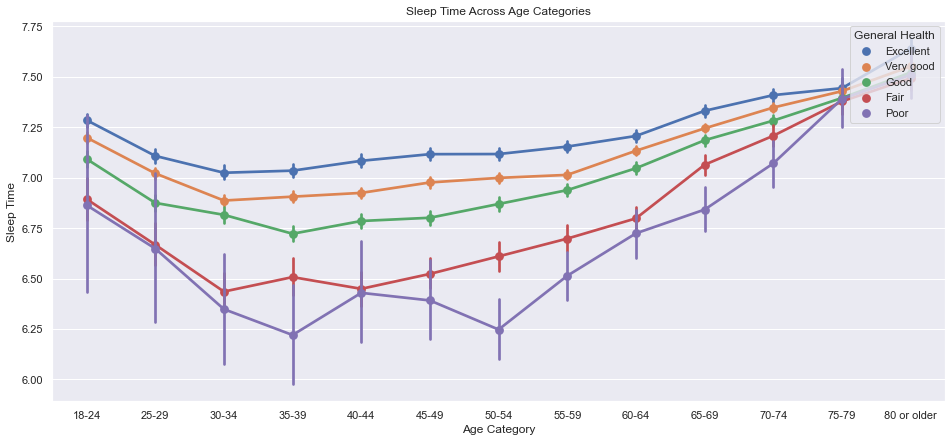

In [6]:
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
'55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
plt.figure(figsize = (16, 7))
hue_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
sb.pointplot(x = "AgeCategory", y = "SleepTime", data = df,hue = 'GenHealth', order = age_order, 
             hue_order = hue_order)
plt.xlabel('Age Category')
plt.ylabel('Sleep Time')
plt.title('Sleep Time Across Age Categories')
plt.legend(loc = "upper right", title = 'General Health')

plt.show()

## Across all age ranges, what is the impact of physical activity to a patient's BMI? 

From our previous visual, we wanted to continue our investigation into the trend of patients as they age - this time - with physical activity considerations. The first important point to observe is a the difference that physical activity plays in affecting BMI. There is a significant difference in the distance betweeen each point, specifically during adulthood. The next observation, albeit minor, is the difference in BMI as a patient ages. It can be observes that most patients reach their peak BMI during adulthood, which could potentially be tied to sleep time and societal structures as well. 

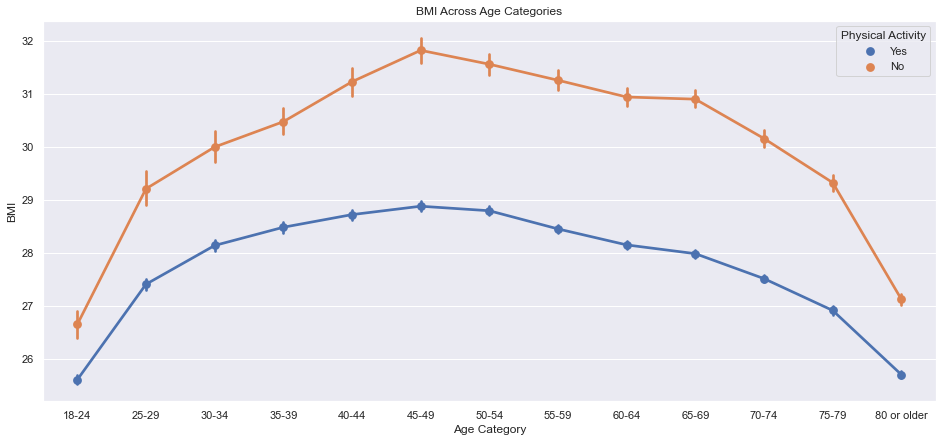

In [7]:
plt.figure(figsize = (16,7))
hue_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
sb.pointplot(x = "AgeCategory", y = "BMI", data = df,hue = 'PhysicalActivity', order = age_order)
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.title('BMI Across Age Categories')
plt.legend(loc = "upper right", title = 'Physical Activity')

plt.show()

## Considering all the features in the dataset, which features are most influential in determining the risk of heart disease?

To close the analysis, we examined the top features that carried the most significance in predicting heart disease in a random forest classification model. It was concluded that patient BMI, sleep-time, physical-activity, and general health all played an essential role in predicting heart disease. I'd like to highlight that all of these factors are within our control. Through our habits, we can dictate how much physical activity we receive, how much time we sleep, and how we affect our general health through our diet.

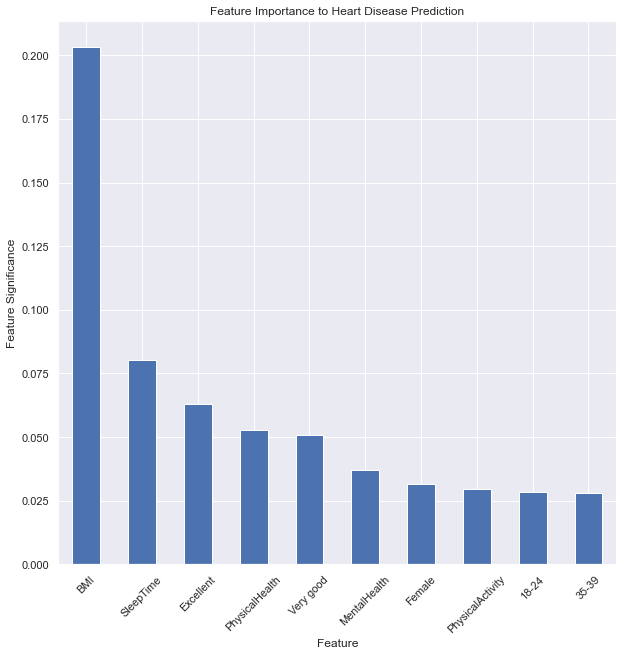

In [8]:
# Defining input and output variables
X = dfML.drop('HeartDisease', axis=1)
y = dfML['HeartDisease']

# Performing Synthetic Minority Oversampling Technique to balance data
# pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
plt.figure(figsize = (10, 10))
importance = pd.Series(rfc.feature_importances_,index = dfML.drop('HeartDisease', axis = 1).columns)
importance.nlargest(10).plot(kind = 'bar', rot = 45)
plt.title('Feature Importance to Heart Disease Prediction')
plt.xlabel('Feature')
plt.ylabel('Feature Significance')
plt.show()

In [ ]:
!jupyter nbconvert "Part 2 - Slide_Deck_Template.ipynb" --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook Part 2 - Slide_Deck_Template.ipynb to slides
[NbConvertApp] Writing 879486 bytes to Part 2 - Slide_Deck_Template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part 2 - Slide_Deck_Template.slides.html
Use Control-C to stop this server
